In [ ]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Model evaluation and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Load processed data
df = pd.read_csv("/content/processed_train_FD001.csv")

# Quick check
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

Shape: (20631, 14)

Columns:
 Index(['engine_id', 'time_in_cycles', 'sensor_2', 'sensor_3', 'sensor_4',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_15', 'sensor_17',
       'sensor_20', 'sensor_21', 'life_fraction', 'RUL'],
      dtype='object')


In [ ]:
df.head()

,engine_id,time_in_cycles,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_15,sensor_17,sensor_20,sensor_21,life_fraction,RUL
0,-1.728084,-1.565170,-1.721725,-0.134255,-0.925936,1.121141,-0.516338,-0.862813,-0.603816,-0.781710,1.348493,1.194427,-1.295890,191
1,-1.728084,-1.550652,-1.061780,0.211528,-0.643726,0.431930,-0.798093,-0.958818,-0.275852,-0.781710,1.016528,1.236922,-1.283870,190
2,-1.728084,-1.536134,-0.661813,-0.413166,-0.525953,1.008155,-0.234584,-0.557139,-0.649144,-2.073094,0.739891,0.503423,-1.271849,189
3,-1.728084,-1.521616,-0.661813,-1.261314,-0.784831,1.222827,0.188048,-0.713826,-1.971665,-0.781710,0.352598,0.777792,-1.259829,188
4,-1.728084,-1.507098,-0.621816,-1.251528,-0.301518,0.714393,-0.516338,-0.457059,-0.339845,-0.136018,0.463253,1.059552,-1.247809,187


In [ ]:
from sklearn.model_selection import train_test_split

# Get all unique engines
engines = df['engine_id'].unique()

# Split engine IDs into train and test groups
train_engines, test_engines = train_test_split(engines, test_size=0.2, random_state=42)

# Create corresponding train and test sets
train_df = df[df['engine_id'].isin(train_engines)]
test_df = df[df['engine_id'].isin(test_engines)]

# Define features and target
X_train = train_df.iloc[:, 1:-1]
y_train = train_df.iloc[:, -1]
X_test = test_df.iloc[:, 1:-1]
y_test = test_df.iloc[:, -1]


In [ ]:
# Initializing the models

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbosity=0
    ),
}

print(f"Initialized {len(models)} regression models.")


Initialized 7 regression models.


In [ ]:
# Training / Evaluating Models

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2
    })

results_df = pd.DataFrame(results).sort_values(by="RMSE", ascending=True)
results_df


,Model,MAE,RMSE,R²
6,XGBoost,3.898502,6.672548,0.989670
4,Random Forest,2.931848,6.868277,0.989055
5,Gradient Boosting,6.164790,9.187497,0.980416
3,Decision Tree,8.551653,14.945524,0.948176
0,Linear Regression,24.778748,31.010851,0.776883
2,Lasso Regression,24.778738,31.011011,0.776881
1,Ridge Regression,24.779024,31.011490,0.776874


/tmp/ipython-input-1073108425.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="RMSE", y="Model", palette="mako")


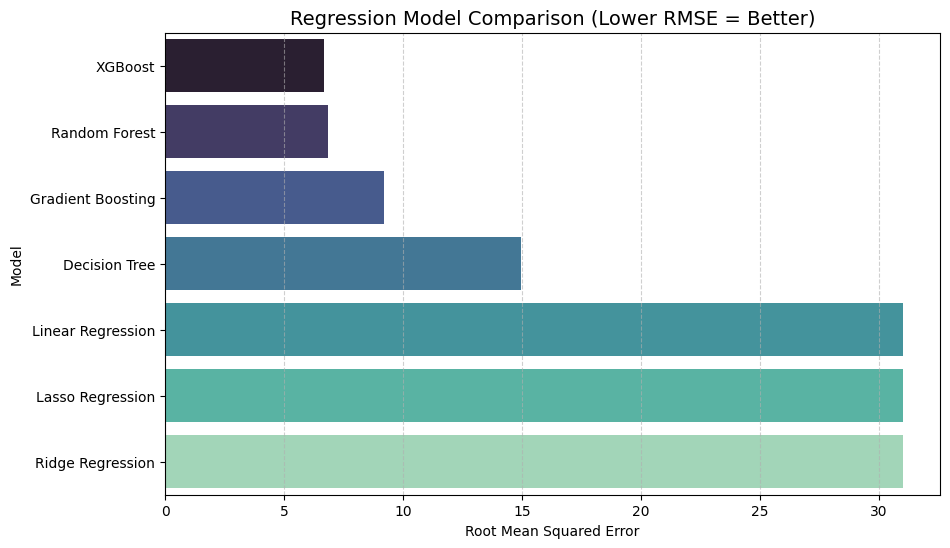

In [ ]:
# Model comparision

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x="RMSE", y="Model", palette="mako")
plt.title("Regression Model Comparison (Lower RMSE = Better)", fontsize=14)
plt.xlabel("Root Mean Squared Error")
plt.ylabel("Model")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()


      Engine_ID     Cycle  Actual_RUL  Predicted_RUL
3112   0.872258 -0.563418          84           86.0
2805   0.666968  0.409298          71           68.0
3557   1.009119  0.307671         110          106.0
3640   1.009119  1.512677          27           21.0
3770   1.111764 -0.084319         164          147.0
3865   1.111764  1.294904          69           68.0
2688   0.666968 -1.289325         188          187.0
2635   0.085313  1.672376          33           37.0
23    -1.728084 -1.231253         168          168.0
2547   0.085313  0.394779         121          128.0


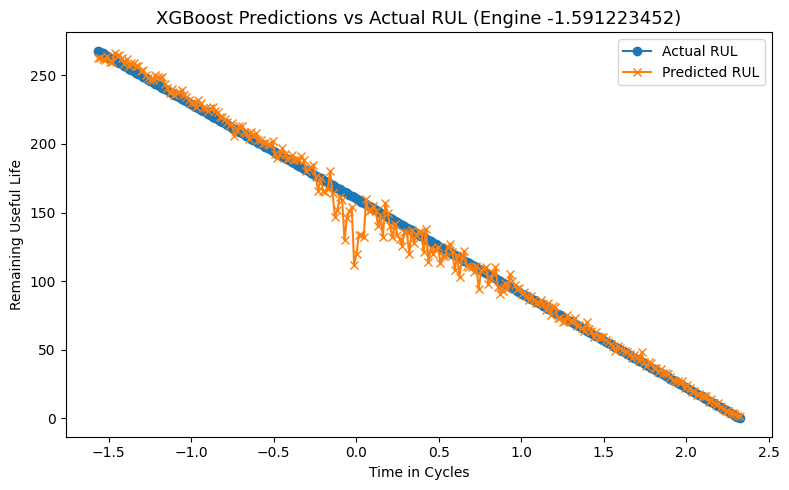

In [ ]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Initialize and train the model
best_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=0
)
best_model.fit(X_train, y_train)

# Predict RUL on test data
y_pred = best_model.predict(X_test)

# Combine into a comparison DataFrame
comparison_df = pd.DataFrame({
    "Engine_ID": test_df["engine_id"].values,
    "Cycle": test_df["time_in_cycles"].values,
    "Actual_RUL": y_test.values,
    "Predicted_RUL": y_pred.round(0)
})

# Display a few random samples
print(comparison_df.sample(10))

# Visualize one engine’s actual vs predicted RUL
engine_id = test_df["engine_id"].unique()[1]
engine_sample = comparison_df[comparison_df["Engine_ID"] == engine_id]

plt.figure(figsize=(8, 5))
plt.plot(engine_sample["Cycle"], engine_sample["Actual_RUL"], label="Actual RUL", marker='o')
plt.plot(engine_sample["Cycle"], engine_sample["Predicted_RUL"], label="Predicted RUL", marker='x')
plt.title(f"XGBoost Predictions vs Actual RUL (Engine {engine_id})", fontsize=13)
plt.xlabel("Time in Cycles")
plt.ylabel("Remaining Useful Life")
plt.legend()
plt.tight_layout()
plt.show()
